<a href="https://colab.research.google.com/github/paulmarone/datman/blob/main/ps0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initial Set-Up for Problem Sets (libraries, webbrowser, functionality, themes/styles)
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

plt.style.use('classic')

In [ ]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
ex1.csv  sample_data


In [ ]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [ ]:
dat.columns #list var names

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)
dat.tail(2)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6


,Person,Height,Self Esteem
18,19,63,3.4
19,20,61,3.6


In [ ]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6
2,3,62,3.8
3,4,75,4.4
4,5,58,3.2
5,6,60,3.1
6,7,67,3.8
7,8,68,4.1
8,9,71,4.3
9,10,69,3.7


In [ ]:
dat["Height"][0:3] #subset or slice

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Height","Self Esteem"]][0:3]

,Height,Self Esteem
0,68,4.1
1,71,4.6
2,62,3.8


In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

,Person,Height,Self Esteem
3,4,75,4.4
16,17,65,4.1
6,7,67,3.8
10,11,68,3.5
2,3,62,3.8
14,15,60,3.4
4,5,58,3.2
17,18,67,3.8
7,8,68,4.1
1,2,71,4.6


In [ ]:
#dat["Height"]

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: Height, dtype: int64

<Axes: >

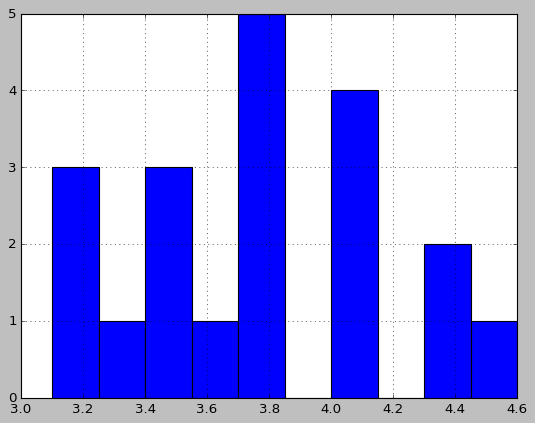

In [ ]:
dat["Self Esteem"].hist() #again, always interpret all output

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.3,4.4,4.6
Height,,,,,,,,,,,,,
58,0,1,0,0,0,0,0,0,0,0,0,0,0
60,1,0,0,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,0,0,0
62,0,0,1,0,0,0,0,1,0,0,0,0,0
63,0,0,0,1,0,0,1,0,1,0,0,0,0
65,0,0,0,0,0,0,0,0,0,1,0,0,0
67,0,1,0,0,0,0,0,2,0,0,0,0,0
68,0,0,0,0,1,0,0,0,0,2,0,0,0
69,0,0,0,0,0,0,1,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Height', ylabel='Self Esteem'>

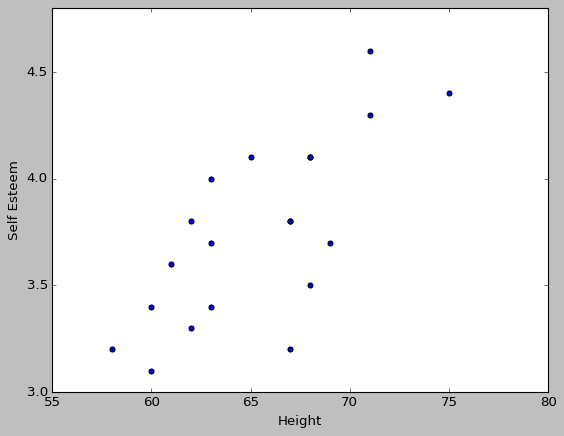

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

,Height,Self Esteem
Height,1.00,0.73
Self Esteem,0.73,1.00
